In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_unido = pd.concat([df_train.drop('Survived',axis=1),df_test], axis=0).reset_index(drop=True)

In [3]:
df_unido.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [97]:
df_unido.isnull().sum().sort_values(ascending=False).head(6)

index          0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
dtype: int64

## Tratando valores nulos

### Cabin

In [11]:
df_unido.drop('Cabin',axis=1,inplace=True)

### Age

Text(0, 0.5, 'Idade')

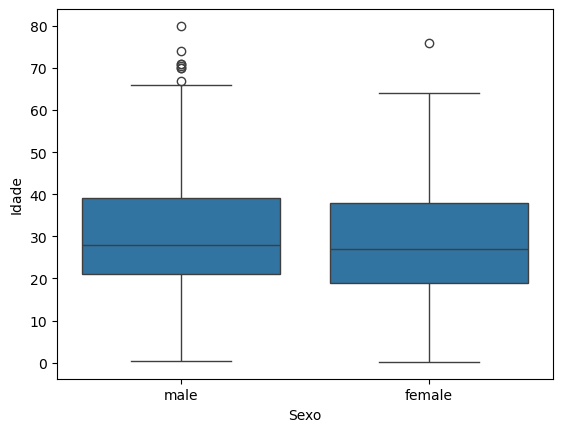

In [31]:
sns.boxplot(data=df_unido,x='Sex', y='Age')
plt.xlabel('Sexo')
plt.ylabel('Idade')

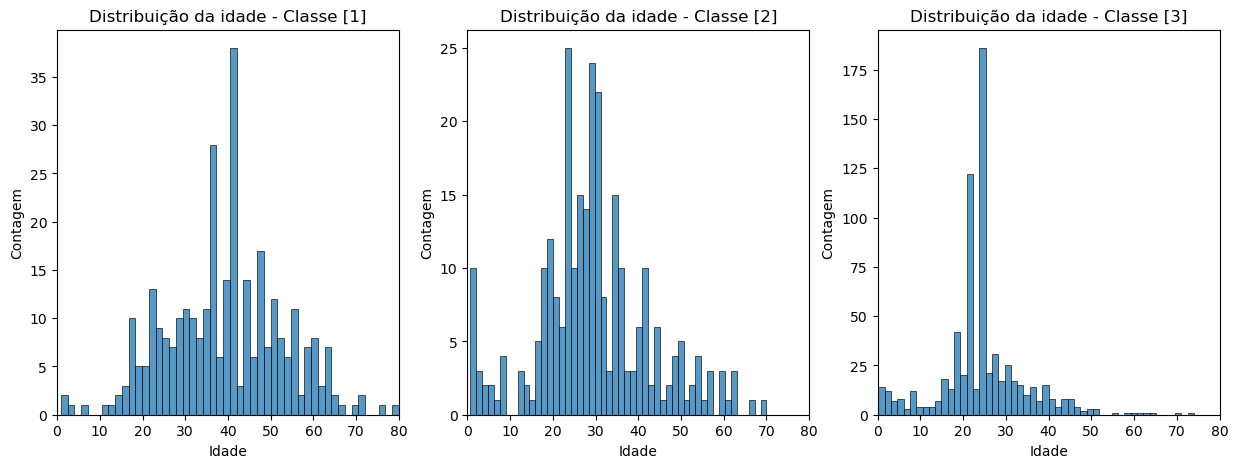

In [48]:
classes = sorted(df_unido['Pclass'].unique())
fig, axes = plt.subplots(1, len(classes), figsize=(15,5))
for i, classe in enumerate(classes):
    sns.histplot(df_unido[df_unido['Pclass'] == classe]['Age'], bins=50, ax=axes[i])
    axes[i].set_title(f"Distribuição da idade - Classe [{classe}]")
    axes[i].set_xlabel("Idade")
    axes[i].set_ylabel("Contagem")
    axes[i].set_xlim(0,80)
    #axes[i].set_ylim(0,60)
plt.show()

In [41]:
df_unido[df_unido['Age'].isnull()]

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
1299,408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
1301,410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
1304,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1307,416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [40]:
df_unido.groupby(['Pclass','Sex'])['Age'].transform('median')

0       25.0
1       36.0
2       22.0
3       36.0
4       25.0
        ... 
1304    25.0
1305    36.0
1306    25.0
1307    25.0
1308    25.0
Name: Age, Length: 1309, dtype: float64

In [44]:
df_unido.groupby(['Pclass','Sex'])['Age'].median().reset_index()

,Pclass,Sex,Age
0,1,female,36.0
1,1,male,42.0
2,2,female,28.0
3,2,male,29.5
4,3,female,22.0
5,3,male,25.0


In [46]:
df_unido['Age'] = df_unido['Age'].fillna(df_unido.groupby(['Pclass','Sex'])['Age'].transform('median'))

### Embarked

In [91]:
df_unido['Embarked'] = df_unido['Embarked'].fillna(df_unido['Embarked'].mode()[0])

### Fare

In [95]:
df_unido.groupby(['Pclass','Embarked'])['Fare'].median().reset_index()

,Pclass,Embarked,Fare
0,1,C,76.7292
1,1,Q,90.0000
2,1,S,52.0000
3,2,C,15.3146
4,2,Q,12.3500
5,2,S,15.3750
6,3,C,7.8958
7,3,Q,7.7500
8,3,S,8.0500


In [96]:
df_unido['Fare'] = df_unido['Fare'].fillna(df_unido.groupby(['Pclass','Embarked'])['Fare'].transform('median'))

### Análise exploratória

In [51]:
df = df_unido.copy()

In [76]:
df.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,pontos,LastName,FirstName,Titulo
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Braund,Owen Harris,
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Cumings,John Bradley (Florence Briggs Thayer),
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Heikkinen,Laina,
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Futrelle,Jacques Heath (Lily May Peel),
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Allen,William Henry,


In [53]:
df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [86]:
def extrair_titulo(nome):
    segunda_parte = nome.split(",")[1]
    titulo_com_ponto = segunda_parte.split()[0]
    titulo = titulo_com_ponto.replace(".", "")
    return titulo

In [87]:
df['LastName'] = df['Name'].str.split(',').str[0]
df['FirstName'] = df['Name'].str.split('.').apply(lambda x: '.'.join(x[1:]))
df['Title'] = df["Name"].apply(extrair_titulo)

In [98]:
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [99]:
df.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,pontos,LastName,FirstName,Titulo,FamilyCount
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Braund,Owen Harris,Mr,1
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Cumings,John Bradley (Florence Briggs Thayer),Mrs,1
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Heikkinen,Laina,Miss,0
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Futrelle,Jacques Heath (Lily May Peel),Mrs,1
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Allen,William Henry,Mr,0


In [106]:
df_unido.groupby(['Pclass','Embarked'])['Fare'].median().reset_index()

,Pclass,Embarked,Fare
0,1,C,76.7292
1,1,Q,90.0000
2,1,S,52.0000
3,2,C,15.3146
4,2,Q,12.3500
5,2,S,15.3750
6,3,C,7.8958
7,3,Q,7.7500
8,3,S,8.0500


In [105]:
df['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [113]:
df[df['Ticket']=='CA. 2343']

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,pontos,LastName,FirstName,Titulo,FamilyCount,GroupSize
159,159,160,3,"Sage, Master. Thomas Henry",male,25.0,8,2,CA. 2343,69.55,S,1,Sage,Thomas Henry,Master,10,11
180,180,181,3,"Sage, Miss. Constance Gladys",female,22.0,8,2,CA. 2343,69.55,S,1,Sage,Constance Gladys,Miss,10,11
201,201,202,3,"Sage, Mr. Frederick",male,25.0,8,2,CA. 2343,69.55,S,1,Sage,Frederick,Mr,10,11
324,324,325,3,"Sage, Mr. George John Jr",male,25.0,8,2,CA. 2343,69.55,S,1,Sage,George John Jr,Mr,10,11
792,792,793,3,"Sage, Miss. Stella Anna",female,22.0,8,2,CA. 2343,69.55,S,1,Sage,Stella Anna,Miss,10,11
846,846,847,3,"Sage, Mr. Douglas Bullen",male,25.0,8,2,CA. 2343,69.55,S,1,Sage,Douglas Bullen,Mr,10,11
863,863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.55,S,1,Sage,"Dorothy Edith ""Dolly""",Miss,10,11
1079,188,1080,3,"Sage, Miss. Ada",female,22.0,8,2,CA. 2343,69.55,S,1,Sage,Ada,Miss,10,11
1233,342,1234,3,"Sage, Mr. John George",male,25.0,1,9,CA. 2343,69.55,S,1,Sage,John George,Mr,10,11
1251,360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,1,Sage,William Henry,Master,10,11


In [109]:
df[df['Ticket']=='CA. 2343']['Fare']/11

159     6.322727
180     6.322727
201     6.322727
324     6.322727
792     6.322727
846     6.322727
863     6.322727
1079    6.322727
1233    6.322727
1251    6.322727
1256    6.322727
Name: Fare, dtype: float64

In [114]:
df['GroupSizeTicket'] = df.groupby('Ticket')['Ticket'].transform('count')
df['FarePerPerson'] = df['Fare'] / df['GroupSizeTicket']